In [33]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [34]:
dist_pickle = pickle.load(open("wide_dist_pickle.p", "rb"))

In [35]:
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

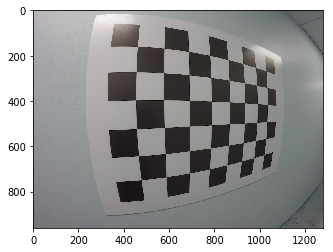

In [36]:
# Read in an image
img = cv2.imread("GOPR0032.jpg")
plt.imshow(img)
plt.show()

In [37]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
                                                       imgpoints, 
                                                       (img.shape[1], img.shape[0]), 
                                                       None, 
                                                       None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

In [38]:
undistorted = cal_undistort(img, objpoints, imgpoints)

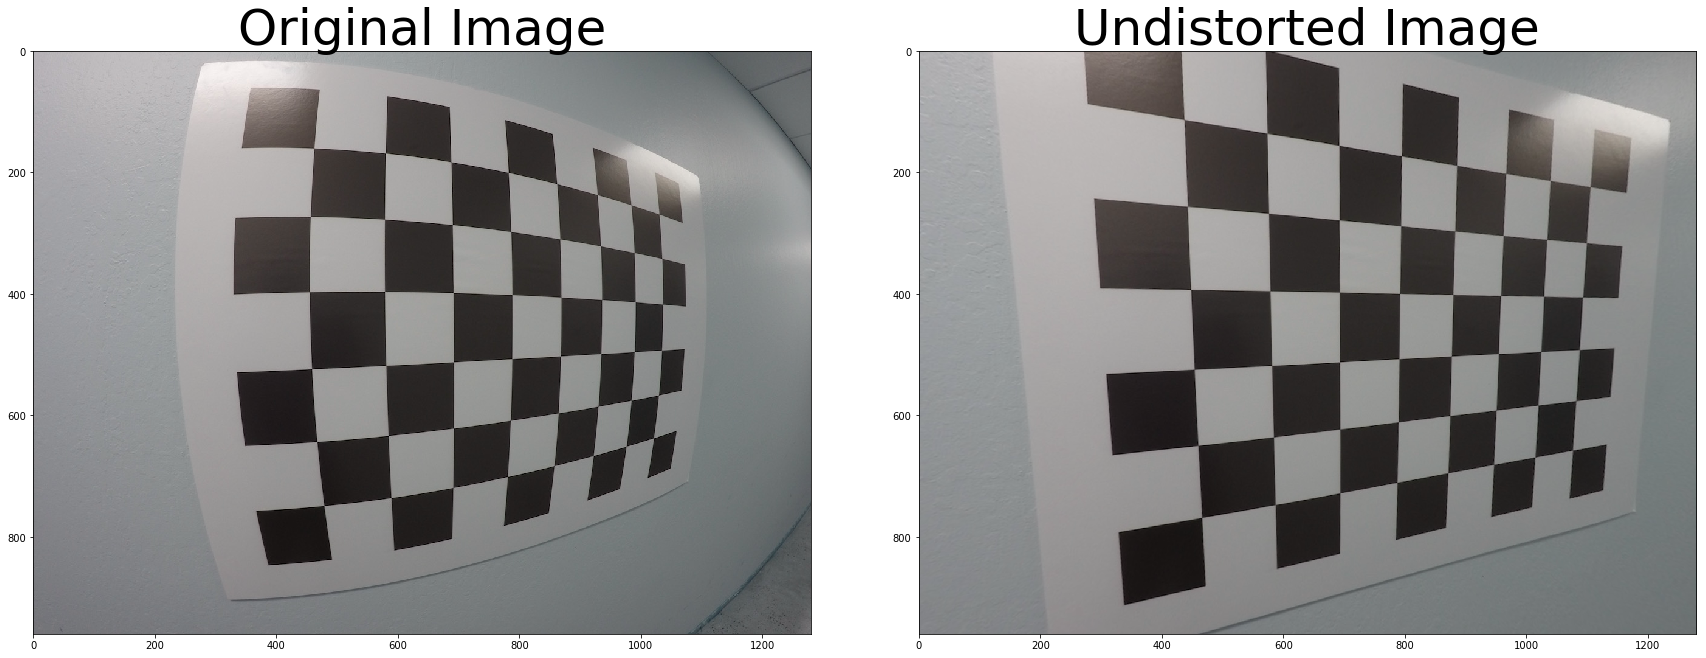

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)